In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as plot_style
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
from virtual_lab.experiments import *
from virtual_lab.simulation import *
from virtual_lab.model import *
from virtual_lab.utils import *
from examples.required_files.const import *
from examples.required_files.experiment_list import *
from examples.required_files.models import *
from virtual_lab.logger import *
Sim = Simulation()
VL_Logger.set_log_level(LogLevel.DIAGNOSTIC)

Set log level to DIAGNOSTIC


In [3]:
variable_labels = {
    "Vpsd": r'$V_{PSD}$',
    "V_tot": r'$V_{tot}$',
    "Vd": r'$V_d$',
    "Vs": r'$V_s$',
    "V_eff": r'$V_{eff}$',
    "Ve": r'$V_m$', 
    "crosslink": 'cross.',
    "stim": "HFS",
    "cytochalasin": "Cytochalasin",
    "jaspl": "Jasplakinolide"
}

# Reproducing Fonseca 2012 experiments for LTP (Cytochalasin and Jasplakinolide)

In [4]:
cytochalasin_exp = Experiment("cytochalasin",
                        {"stim": [[300,STET]], 
                        "LFS": [], 
                        "crosslink": [[300,X_STET]], 
                        "protein" : [[300+P_ONSET,PROTEIN]],
                        "cytochalasin": [[300+STET, 300+STET+60*100]]},
                        exp_data = data_LTP, T= T)

jasplakinolide_exp = Experiment("jasplakinolide",
                        {"stim": [[300,STET]], 
                        "LFS": [], 
                        "crosslink": [[300,X_STET]], 
                        "protein" : [[300+P_ONSET,PROTEIN]],
                        "jaspl": [[300+STET, 300+STET+60*100]]},
                        exp_data = data_LTP, T= T)
print(jasplakinolide_exp.jaspl)

const_base = CONSTANTS.copy()
base_model = BaseModel("Base", {"Vd":None,"Vs":None,"Vpsd":1,"V_eff":None,"V_tot":None},const = const_base,
                        labels = variable_labels)
Sim.add_model(base_model)
# Optimizing constants for this model
const_momentum = CONSTANTS.copy()
enlarge_dict = {# Enlargement pool
    # Crosslinker binding rates
    "k_u_0" : 1/2.5/3600, # Basal transition rates between stable and dynamic pool
    "k_b_0" : 1/2.5/600, # CaMKII active (unbound) for about 1 min after LTP (Lee et al 2009)
    "tau_add_Ve":5400, #5400
    "tau_Ve": 3300, # 33000
    # Dynamic pool timescale
    "tau_Vd": 4800,
    "nf_LTP": 14} # 4800
const_momentum.update(enlarge_dict)
mom_model = MomentumModel("PSD Layering",{"Vd": None, "Vs": None, "Vpsd": 1., "V_eff": None,"V_tot": None,"Ve": None}, 
                            const = const_momentum,labels = variable_labels)
Sim.add_model(mom_model,switching=False)

[[420, 6840]]
INFO Simulation: Switching to model Base
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json


In [5]:
# Uncomment this line if you want to see the results from the PSD layering model
Sim.switch_model("PSD Layering")
# # And this for the Base model
# Sim.switch_model("Base")

INFO Simulation: Simulating 2 experiments took: 0.231 s
INFO Simulation: Plotting 2 experiments
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
exp_quantities {'stim': [[300, 420]], 'LFS': [], 'crosslink': [[300, 420]], 'protein': [[3000, 6600]], 'cytochalasin': [[420, 6840]]}
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
DEBUG Simulation: Plotting experimental quantities: ['crosslink', 'crosslink', 'protein', 'stim', 'LFS', 'cytochalasin', 'stim', 'LFS', 'stim', 'LFS', 'jaspl']
['protein', 'crosslink', 'stim', 'LFS', 'cytochalasin']
quantities protein
quantities crosslink
quantities stim
quantities LFS
quantities cytochalasin
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
exp_quantities {'stim': [[300, 420]], 'LFS': [], 'crosslink': [[300, 420]], 'protein': [[3000, 6600]], 'jaspl': [[420, 6840]]}
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
DEBUG Simulation: Plotting experimental quantiti

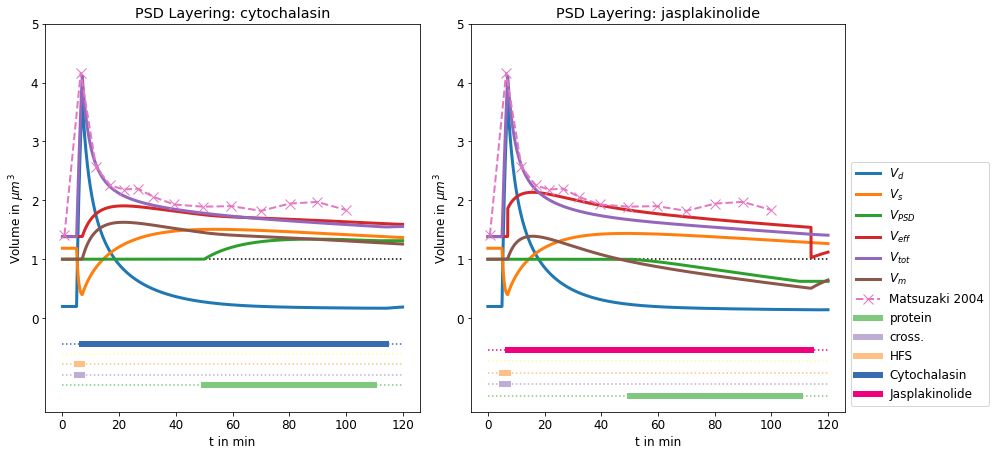

In [6]:
Sim.run_experiments([cytochalasin_exp, jasplakinolide_exp])
Sim.plot_results(filename = f"Fonseca-2012-{Sim.model.name}.svg")

# Reproducing Experiments on LTD from Szabo 2016

INFO Simulation: Simulating 2 experiments took: 0.208 s
INFO Simulation: Plotting 2 experiments
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
exp_quantities {'stim': [], 'LFS': [[300, 2100]], 'crosslink': [[300, 2100]], 'protein': [[3000, 6600]], 'cytochalasin': [[0, 2700]]}
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
DEBUG Simulation: Plotting experimental quantities: ['crosslink', 'crosslink', 'protein', 'stim', 'LFS', 'cytochalasin', 'stim', 'LFS', 'stim', 'LFS', 'jaspl']
['protein', 'crosslink', 'stim', 'LFS', 'cytochalasin']
quantities protein
quantities crosslink
quantities stim
quantities LFS
quantities cytochalasin
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
exp_quantities {'stim': [], 'LFS': [[300, 2100]], 'crosslink': [[300, 2100]], 'protein': [[3000, 6600]], 'cytochalasin': [], 'jaspl': [[0, 2700]]}
DEBUG Simulation: Saving user preferences to usr_prefs/user_prefs.json
DEBUG Simulation: Plotting e

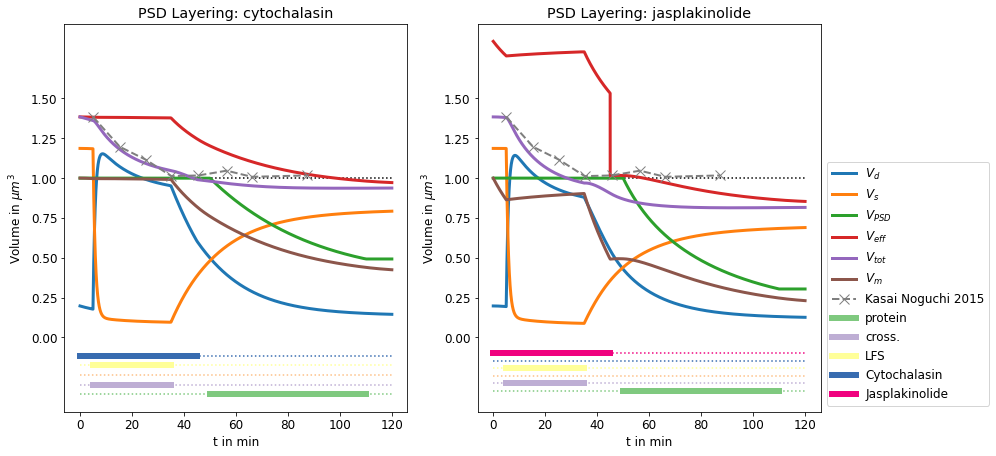

In [7]:
cytochalasin_exp = Experiment("cytochalasin",
                    {"stim": [],
                            "LFS": [[300, LFS]],
                            "crosslink": [[300, X_LFS]],
                            "protein" : [[300+P_ONSET, PROTEIN]],
                            "cytochalasin": [[0,3*LFS]] },
                            exp_data = data_LTD, T=T)  

jasplakinolide_exp = Experiment("jasplakinolide",
                        {"stim": [],
                            "LFS": [[300, LFS]],
                            "crosslink": [[300, X_LFS]],
                            "protein" : [[300+P_ONSET, PROTEIN]],
                            "cytochalasin": [],
                             "jaspl": [[0,3*LFS]] },
                            exp_data = data_LTD, T=T)  

Sim.run_experiments([cytochalasin_exp, jasplakinolide_exp])
Sim.plot_results(filename = f"Szabo-2015-{Sim.model.name}.svg")